# Exercise 4
### Knowledge Graph Construction Process

The following exercise handles task 3. Before starting, the exercise requires "PyRML" library from GitHub. To install, run the following cell below. For reference, check for [PyRML Documentation](https://github.com/anuzzolese/pyrml/blob/master/README.md) in GitHub.

In [1]:
from IPython.display import clear_output
import pandas as pd

In [2]:
# Run this cell be
!pip install git+https://github.com/anuzzolese/pyrml
clear_output()

### Task 3

#### Task 3.1
Given 'users.csv' contains list of users for a streaming platform. Based on the csv source file, design a mapping as in .ttl format. Using the mapping, create knowledge graph and print the triples.

In [32]:
!pip install rdflib networkx matplotlib
clear_output()

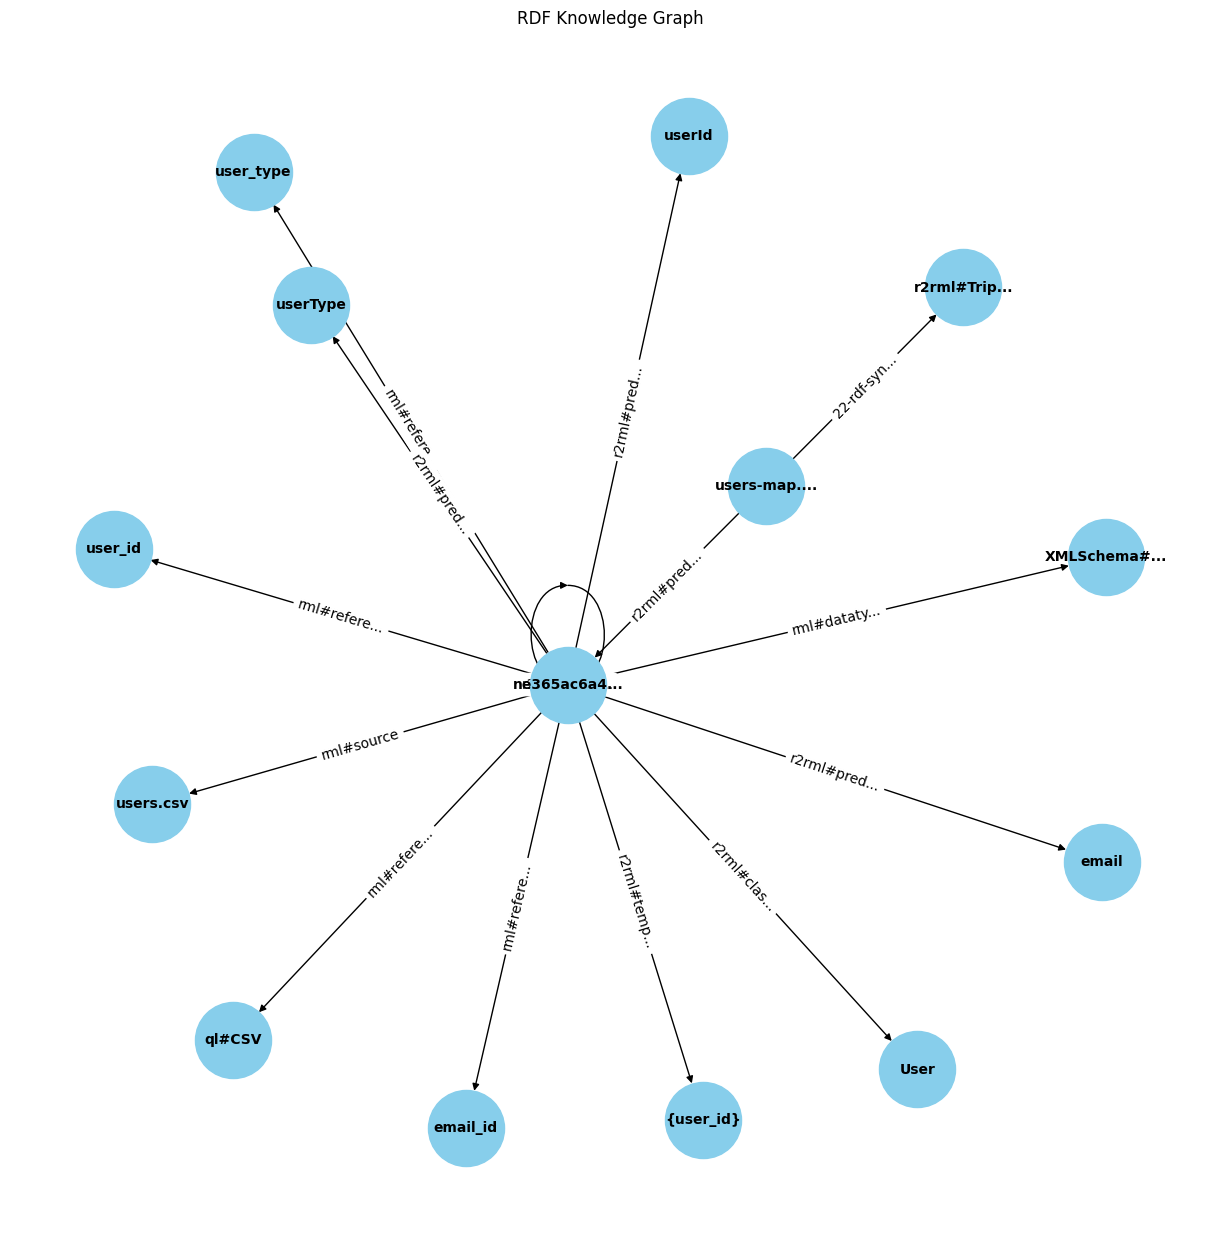

In [1]:
from HelperFunctions import visualize_rdf_graph

visualize_rdf_graph("./data/users-map.ttl", summarize=True)

In [31]:
# Importing required libraries
from pyrml import RMLConverter

# Initializing RML Converter for .ttl
converter = RMLConverter()

# Conversion 
g = converter.convert("./data/users-map.ttl")

# Checking out triples in newly generated Knowledge Graph
for s, p, o in g:
    print(f"{s} -----({p})----> {o}\n")


The RML mapping contains 1 triple mappings.
Mapping computed in 0.004452705383300781 secs producing 16 triples.
http://example.org/users/xhgd -----(http://example.org/userType)----> basic

http://example.org/users/xhgd -----(http://example.org/email)----> jach.otool@ex.org

http://example.org/users/by82 -----(http://www.w3.org/1999/02/22-rdf-syntax-ns#type)----> http://example.org/User

http://example.org/users/xhgd -----(http://www.w3.org/1999/02/22-rdf-syntax-ns#type)----> http://example.org/User

http://example.org/users/921d -----(http://example.org/email)----> David.Hesorn_Life@ex.com

http://example.org/users/921d -----(http://www.w3.org/1999/02/22-rdf-syntax-ns#type)----> http://example.org/User

http://example.org/users/ad24 -----(http://www.w3.org/1999/02/22-rdf-syntax-ns#type)----> http://example.org/User

http://example.org/users/by82 -----(http://example.org/userType)----> free

http://example.org/users/ad24 -----(http://example.org/userType)----> basic

http://example.org/

#### Task 3.2
Consider two table sources "books.csv" and "authors.csv". Using 'library-map.ttl', generate knowledge graph from given csv files. Perform a query for list of books written by George Orwell with available status. Use example.com as prefix

In [28]:
from pyrml import RMLConverter

# Code here

# Setting up new Knowledge Graph for library books
converter = RMLConverter()
libGraph = converter.convert("./data/library-map.ttl")


# The query for George Orwell Books
query = """
PREFIX ex: <http://example.com/>

SELECT ?bookTitle ?authorName
WHERE {
  ?author a ex:Person ;
          ex:name "George Orwell" ;
          ex:author_id ?authorId ;
          ex:name ?authorName .
  ?book a ex:Book ;
        ex:author ?authorId ;
        ex:book_name ?bookTitle ;
        ex:Status "available" .
}
"""

# Query Execution
result = libGraph.query(query)

# The Result
for row in result:
    print(f"\n{row['bookTitle']} written by {row['authorName']}")

The RML mapping contains 2 triple mappings.
Mapping computed in 0.0071086883544921875 secs producing 61 triples.

1984 written by George Orwell
